In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [4]:
data = pd.read_csv('API_SG.GEN.PARL.ZS_DS2_en_csv_v2_2252284.csv')
# data.rename({'Indicator Name': 'IndicatorName', axis=1, inplace=True)
# data.drop(data.index.difference(['United States']), 1, inplace=True)
data.head()

,CountryName,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,CountryCode,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1,IndicatorName,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...
2,IndicatorCode,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,...,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS,SG.GEN.PARL.ZS
3,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data.columns.tolist()

In [6]:
study_set = data[["CountryName", "United States"]]
study_set.rename(columns={"CountryName": "year"}, inplace=True )
study_set.drop([0, 1, 2], inplace=True)
study_set.fillna(0, inplace=True)
#study_set.fillna(study_set.median(), inplace=True)
study_set.head(20)

C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,year,United States
3,1960,0
4,1961,0
5,1962,0
6,1963,0
7,1964,0
8,1965,0
9,1966,0
10,1967,0
11,1968,0
12,1969,0


In [7]:
study_set.info()
# study_set = study_set.replace(',','', regex=True).astype(np.int64)
# study_set['United States'] = [float(x) for x in study_set['United States'].values]
# np.round(study_set, 0)
# cols = ['United States']
# study_set[cols] = study_set[cols].astype(int)
# study_set['United States'] = pd.to_numeric(study_set['United States'], errors='coerce')
# print (study_set[ pd.to_numeric(study_set['United States'], errors='coerce').isnull()])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 3 to 63
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           61 non-null     object
 1   United States  61 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [8]:
# converting the year object type to float to prevent unhashable type: 'numpy.ndarray' error message 
study_set["year"] = study_set["year"].astype(str).astype(float)

#Store the data in the form of dependent and Independent variables separately 
X = study_set.iloc[:, 0:1].values
y = study_set.iloc[:, 1].values 


<ipython-input-8-4607acd9bcbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_set["year"] = study_set["year"].astype(str).astype(float)


In [9]:
# X

In [10]:
#split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0 )

In [11]:
#split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0 )

In [12]:
#Fit the Simple linear Regression model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

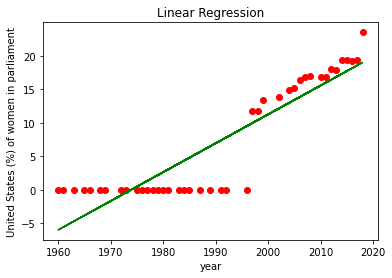

In [13]:
# Visualise the linear Regression Result  if best fit line match more accuracy 
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, LinReg.predict(X_train), color = 'green')
plt.title ('Linear Regression')
plt.xlabel('year')
plt.ylabel('United States (%) of women in parliament')
plt.show()

In [14]:
# add the polynomial tern to the equation/model
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree =2)
X_polynom = polynom.fit_transform(X_train)

# X_polynom

In [15]:
#Fit the Polynomial Regression Model
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)


LinearRegression()

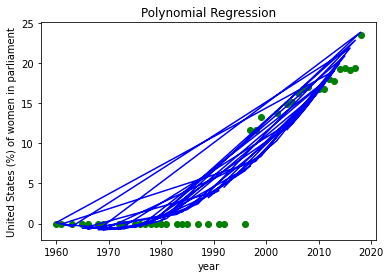

In [34]:
#visualise the Polynomial Regression Results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('year')
plt.ylabel('United States (%) of women in parliament')
plt.show()

In [35]:
# predicted % in parliament from test dataset simple linear regression 
Y_predict_slr = LinReg. predict(X_test)

#Model Evaluation using R-square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, Y_predict_slr)
print('R-Sqaure Error associated with Simple Linear Regression:', r_square)

R-Sqaure Error associated with Simple Linear Regression: 0.5700825335979587


In [18]:
# predicted % in parliament from test dataset simple linear regression  (more closer to 1)
Y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))
#Model Evaluation using R-square for Simple Linear Regression
r_square = metrics.r2_score(y_test, Y_predict_pr)
print('R-Sqaure Error associated with Polynomial Regression:', r_square)

R-Sqaure Error associated with Polynomial Regression: 0.8189475462495095


In [36]:
# Prediciting % in parliament based on year using linear Regression
LinReg.predict([[2050]]) 

array([32.77996649])

In [37]:
# Prediciting % in parliament based on year using Polynomial Regression
PolyReg.predict(polynom.fit_transform([[2050]]))

array([66.89831993])

In [21]:
study_set2= data[["CountryName", "United States", "Japan", "China", "Korea, Rep.", "Germany",
                    "Singapore", "United Kingdom", "Russian Federation"]]
study_set2.drop([0, 1, 2], inplace=True)
study_set2.rename(columns={"CountryName": "year"}, inplace=True )
study_set2.fillna(0, inplace=True)
# study_set2.fillna(study_set2.median(), inplace=True)

C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\obic\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [22]:
study_set2.rename(columns={"Korea, Rep.": "South Korea"}, inplace=True )
study_set2.columns = study_set2.columns.str.replace(' ', '') 
study_set2.drop_duplicates(keep=False,inplace=True) 
study_set2['Ticks']= range(0,len(study_set2.year.values))              
study_set2.tail(2)

<ipython-input-22-3e570e021fce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_set2.drop_duplicates(keep=False,inplace=True)
<ipython-input-22-3e570e021fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_set2['Ticks']= range(0,len(study_set2.year.values))


,year,UnitedStates,Japan,China,SouthKorea,Germany,Singapore,UnitedKingdom,RussianFederation,Ticks
62,2019,23.43387471,10.10752688,24.94117647,16.66666667,30.88857546,23,32,15.77777778,59
63,2020,23.43387471,9.892473118,24.94117647,19,31.17066291,29.47368421,33.84615385,15.77777778,60


In [23]:
# 'Ticks~(UnitedStates)+ (Japan)+ (China)' 
# 'Ticks~(UnitedStates)+ (SouthKorea)+(Singapore)'
# 'Ticks~(UnitedStates)+ (UnitedKingdom)+ (RussianFederation)'

group = study_set2.iloc[:, 1:9]
formula = 'Ticks~(UnitedStates)+ (UnitedKingdom)+ (RussianFederation)'                                                                                  
lm = ols(formula, study_set2).fit()
print(anova_lm(lm))
 
            

            

                     df        sum_sq     mean_sq         F        PR(>F)
UnitedStates       18.0  14213.070175  789.615010  7.109435  2.147851e-07
UnitedKingdom      15.0   4080.481579  272.032105  2.449288  1.299810e-02
RussianFederation   8.0    137.104345   17.138043  0.154305  9.954497e-01
Residual           38.0   4220.500000  111.065789       NaN           NaN


In [24]:
group.tail(5)

,UnitedStates,Japan,China,SouthKorea,Germany,Singapore,UnitedKingdom,RussianFederation
59,19.16859122,9.473684211,23.62284556,17,36.45007924,23.76237624,29.58397535,12.66666667
60,19.35483871,10.10752688,24.24760602,17,30.74753173,23,32,15.77777778
61,23.50230415,10.10752688,24.89932886,17,30.74753173,23,32.15384615,15.77777778
62,23.43387471,10.10752688,24.94117647,16.66666667,30.88857546,23,32,15.77777778
63,23.43387471,9.892473118,24.94117647,19,31.17066291,29.47368421,33.84615385,15.77777778


In [25]:
# Doing Mulitple Linear Regression on top 5  advanced countries 

In [26]:
a = study_set2.drop({'year','Ticks' }, axis =1).values
b = study_set2['year'].values

In [27]:
# Split the dataset in trainign set and test set 
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.3, random_state=0)

In [28]:
ml = LinearRegression()
ml.fit(a_train,b_train)

LinearRegression()

In [29]:
b_pred=ml.predict(a_test)
print(b_pred)

[1977.07456971 1977.07456971 2021.45209754 1977.07456971 1977.07456971
 1977.07456971 1977.07456971 2017.81197866 1995.34551194 1977.07456971
 1977.07456971 1977.07456971 1977.07456971 2001.3489468  1977.07456971
 2002.86166562 2008.01507767 1977.07456971 1977.07456971]


In [30]:
from sklearn.metrics import r2_score
r2_score(b_test, b_pred)

0.6657203558101609

Text(0.5, 1.0, 'Actual vs. predicted')

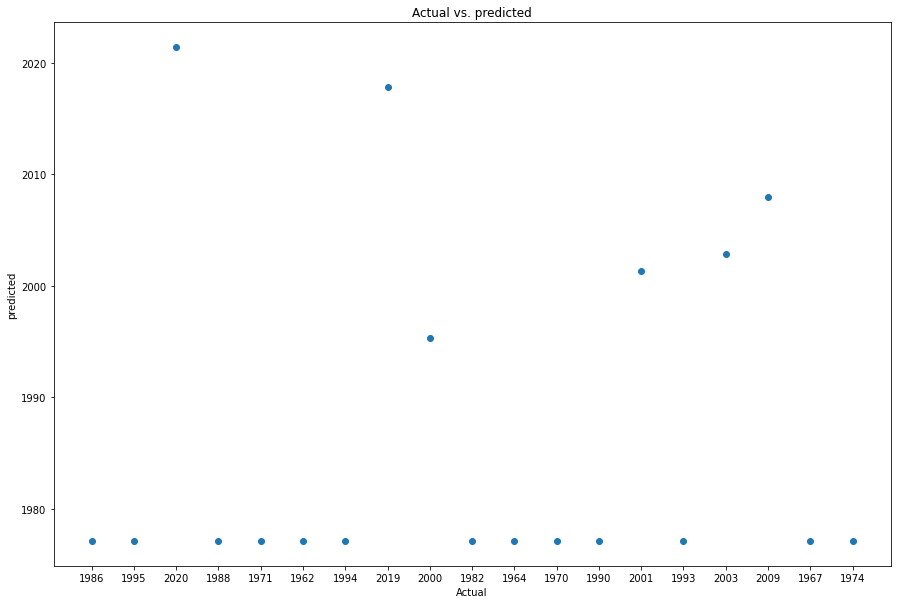

In [31]:
plt.figure(figsize=(15, 10))
plt.scatter(b_test,b_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs. predicted')